Carga de librerias

In [1]:
### Protecto Final
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leer el archivo

In [2]:
InventarioFINAL = pd.read_csv("EndInvFINAL12312016.csv",sep=',')

### Para darnos una idea general de los datos, se imprimen las primeros 5 lineas.

In [3]:
InventarioFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


# Análisis exploratorio de datos (EDA)

In [4]:
# Se creó una función donde devuelve una tabla con la info necesaria para obtener información de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Columna', 'TipoDato', 'Filas', 'Valores Unicos', 'Missings', 'Missings (%)'])
    for column in df.columns:
        data_type = df[column].dtype
        rows = df[column].shape[0] 
        unique_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, rows, unique_count,  missing_values, missing_percentage.round(4)]
    return report

In [5]:
dataframe_info(InventarioFINAL)

,Columna,TipoDato,Filas,Valores Unicos,Missings,Missings (%)
0,InventoryId,object,224489,224489,0,0.000
1,Store,int64,224489,80,0,0.000
2,City,object,224489,67,1284,0.572
3,Brand,int64,224489,9653,0,0.000
4,Description,object,224489,8732,0,0.000
5,Size,object,224489,47,0,0.000
6,onHand,int64,224489,548,0,0.000
7,Price,float64,224489,354,0,0.000
8,endDate,object,224489,1,0,0.000


Vemos en que Columna estan esos nulos

In [6]:
#Verificar si hay filas con valores nulos
filas_nulas = InventarioFINAL.isnull().any(axis=1)

#Mostrar filas con valores nulos
filas_con_nulos = InventarioFINAL[filas_nulas]

#Imprimir las filas con valores nulos
if not filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
       InventoryId  Store City  Brand                   Description   Size  \
113895      46__58     46  NaN     58   Gekkeikan Black & Gold Sake  750mL   
113896      46__62     46  NaN     62      Herradura Silver Tequila  750mL   
113897      46__63     46  NaN     63    Herradura Reposado Tequila  750mL   
113898      46__77     46  NaN     77   Three Olives Espresso Vodka  750mL   
113899     46__106     46  NaN    106      Mr Boston Peach Schnapps  Liter   
...            ...    ...  ...    ...                           ...    ...   
115174   46__46447     46  NaN  46447         Gascon Malbec Mendoza  750mL   
115175   46__46458     46  NaN  46458      Layer Cake Barosa Shiraz  750mL   
115176   46__46476     46  NaN  46476          Tilia Malbec Mendoza  750mL   
115177   46__46764     46  NaN  46764  Clayhouse Adobe Red Paso Rbl  750mL   
115178   46__46830     46  NaN  46830         Pacific Rim Sweet Rsl  750mL   

        onHand  Price     

Comprobamos si hay duplicados.

In [7]:
duplicados = InventarioFINAL.duplicated().any()
if duplicados:
    print(f"El dataset tiene duplicados.")
else:
    print(f"El dataset no tiene duplicados.")

El dataset no tiene duplicados.


Vemos que estan en la columna "City/Ciudad"

La exploración de datos ayuda a identificar irregularidades que necesitan limpieza y preprocesamiento:

- Hay 1284 valores nulos, en la columna "City", vimos que tiene la store 46, deducimos que la ciudad deberia ser TYWARDREATH segun lo que vimos en otra tabla.
- El formato de fecha difiere entre tablas. Por ejemplo, la tabla de VentasFinal utiliza mm/dd/aaaa, mientras que las otras como esta utilizan aaaa/mm/dd.

Realizamos un analisis descriptivo de cada columna

In [8]:
#iteramos sobre cada columna de nuestro dataframe con un cilo for
for i in InventarioFINAL.columns:
    print(i)
    print(InventarioFINAL[i].describe()) 
    print('------------------------')

InventoryId
count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object
------------------------
Store
count    224489.000000
mean         43.505740
std          23.326415
min           1.000000
25%          23.000000
50%          44.000000
75%          66.000000
max          81.000000
Name: Store, dtype: float64
------------------------
City
count        223205
unique           67
top       MOUNTMEND
freq          18065
Name: City, dtype: object
------------------------
Brand
count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64
------------------------
Description
count                   224489
unique                    8732
top       Jagermeister Liqueur
freq                       462
Name: Description, dtype: object
------------------------
Si

# ETL  Limpieza y Procesamiento de datos

Cambiar el nombre de las columnas.

In [9]:
InventarioFINAL.rename(columns={'InventoryId': 'Inventario_FinalID'}, inplace=True)
InventarioFINAL.rename(columns={'Store': 'Tienda'}, inplace=True)
InventarioFINAL.rename(columns={'City': 'Ciudad'}, inplace=True)
InventarioFINAL.rename(columns={'Brand': 'MarcaID'}, inplace=True)
InventarioFINAL.rename(columns={'Description': 'Descripcion'}, inplace=True)
InventarioFINAL.rename(columns={'Size': 'Tamaño'}, inplace=True)
InventarioFINAL.rename(columns={'onHand': 'Unidad_Disponible'}, inplace=True)
InventarioFINAL.rename(columns={'Price': 'Precio_venta'}, inplace=True)
InventarioFINAL.rename(columns={'endDate': 'Fecha'}, inplace=True)

- Llenaremos esos 1284 nulos con la Ciudad que corresponde, como todos pertenecen a la misma tienda, y sabemos de que ciudad es esa tienda en otra tabla, simplement los reemplazamos por el nombre de la ciudad (TYWARDREATH)

In [10]:
InventarioFINAL['Ciudad'].fillna('TYWARDREATH', inplace=True)

C:\Users\Win10\AppData\Local\Temp\ipykernel_6908\325581571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  InventarioFINAL['Ciudad'].fillna('TYWARDREATH', inplace=True)


Irregularidades en las entradas de datos.
La columna Size varía en la información sobre el tamaño, pero lo que nos interesa es
la cantidad de productos en cada linea, pero las que vienen de oferta ej: "pack x 3" se
deben contabilizar por 3, por lo que agregamos una columna al costado para contabilizar.

In [11]:
import re
# Función para contar las unidades
def count_units(Tamaño):
    # Si el valor contiene "Pk", extrae el número antes de "Pk"
    if 'Pk' in Tamaño:
        match = re.search(r'(\d+)\s*Pk', Tamaño)
        if match:
            return int(match.group(1))
    # En caso contrario, cuenta como 1
    return 1

# Aplicar la función a la columna 'Tamaño'
InventarioFINAL['Cantidad'] = InventarioFINAL['Tamaño'].apply(count_units)

# Mostrar el DataFrame resultante
print(InventarioFINAL)

       Inventario_FinalID  Tienda        Ciudad  MarcaID  \
0       1_HARDERSFIELD_58       1  HARDERSFIELD       58   
1       1_HARDERSFIELD_62       1  HARDERSFIELD       62   
2       1_HARDERSFIELD_63       1  HARDERSFIELD       63   
3       1_HARDERSFIELD_72       1  HARDERSFIELD       72   
4       1_HARDERSFIELD_75       1  HARDERSFIELD       75   
...                   ...     ...           ...      ...   
224484  81_PEMBROKE_90087      81      PEMBROKE    90087   
224485  81_PEMBROKE_90088      81      PEMBROKE    90088   
224486  81_PEMBROKE_90089      81      PEMBROKE    90089   
224487  81_PEMBROKE_90090      81      PEMBROKE    90090   
224488  81_PEMBROKE_90604      81      PEMBROKE    90604   

                         Descripcion Tamaño  Unidad_Disponible  Precio_venta  \
0        Gekkeikan Black & Gold Sake  750mL                 11         12.99   
1           Herradura Silver Tequila  750mL                  7         36.99   
2         Herradura Reposado Tequila  7

# Análisis  de Datos

Primero vemos de nuevo las primeras 5 filas de la tabla

In [12]:
InventarioFINAL.head()

,Inventario_FinalID,Tienda,Ciudad,MarcaID,Descripcion,Tamaño,Unidad_Disponible,Precio_venta,Fecha,Cantidad
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31,1
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31,1
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31,1
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31,1
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31,1


Ahora vemos el tamaño de la misma.

In [13]:
np.shape(InventarioFINAL)

(224489, 10)

Guardamos la data en un csv.

In [14]:
InventarioFINAL.to_csv("InventarioFINAL.csv",index=False)

# Visualizaciones e identificacion de relaciones y patrones.

 Mapa de calor de correlación entre variables numéricas

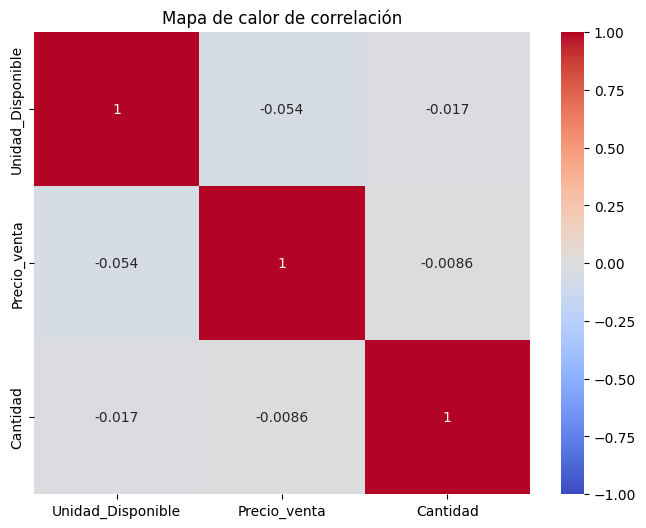

In [15]:
# Seleccionar variables numéricas para el mapa de calor
numeric_cols = ['Unidad_Disponible', 'Precio_venta', 'Cantidad']

# Calcular la matriz de correlación
correlation_matrix = InventarioFINAL[numeric_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación')
plt.show()

 Gráfico de barras de cantidad de productos por ciudad o tienda el top 10 ciudades con mas productos

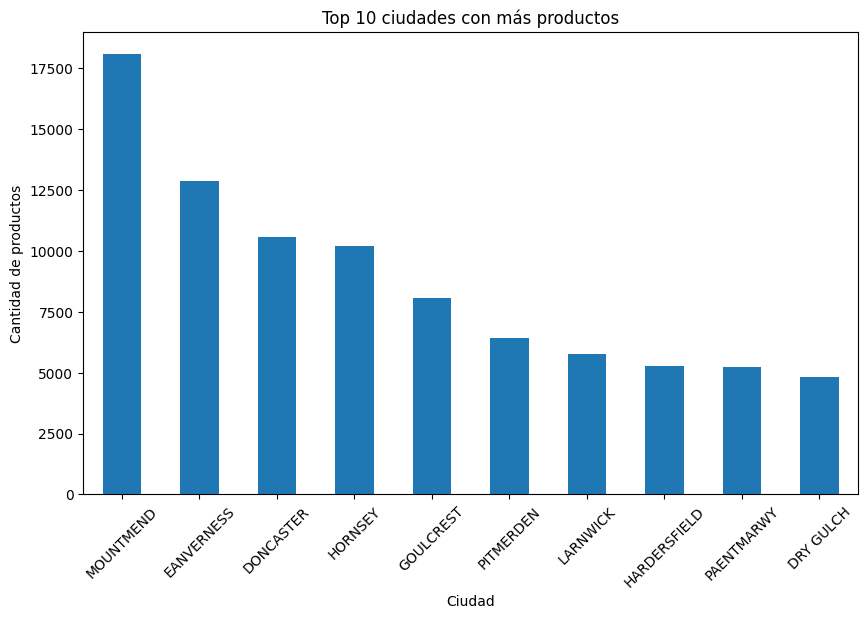

In [16]:
# Contar la cantidad de productos por ciudad
productos_por_ciudad = InventarioFINAL['Ciudad'].value_counts()

# Seleccionar las 5 ciudades con más productos
top_ciudades = productos_por_ciudad.nlargest(10)

# Crear el gráfico de barras para las 5 ciudades top
plt.figure(figsize=(10, 6))
top_ciudades.plot(kind='bar')
plt.title('Top 10 ciudades con más productos')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.show()